<a href="https://colab.research.google.com/github/MoudiAlhazzaa/Tuwaiq_Kaggle_Competition/blob/main/PyVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Preprocessing

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

### Download the competition datasets provided on the Kaggle competition page.


In [84]:
dftrn = pd.read_csv("/content/train.csv")
dftst = pd.read_csv("/content/test.csv")

### Explore the datasets to understand the features and target variables.

In [85]:
dftrn

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,نعم,البكالوريوس,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,لا,البكالوريوس,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0


In [86]:
dftrn.sample(10)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
4201,62102a8e-711f-4a02-8d05-b2d884a38832,34.0,ذكر,منطقة مكة المكرمة,جدة,580f44fe-6cce-41f2-b890-17bae1553aae,CAUF,NaN,NaN,مبتدئ,...,لا,الماجستير,أمن سيبراني,NaN,4.95,5.0,موظف,NaN,NaN,1
6435,1666521a-cae7-4a56-a4dd-596eb35d4ce5,34.0,أنثى,المنطقة الشرقية,الدمام,ee1206d8-ea7a-492e-af9d-24d6f4039e18,PCRF,PCRF,ناشئة,مبتدئ,...,نعم,البكالوريوس,حاسب آلي,NaN,3.90,5.0,غير موظف,NaN,NaN,0
5237,f290d912-45f8-4814-8c99-afe302e09f0a,24.0,أنثى,منطقة مكة المكرمة,جدة,8d7f7985-b199-4712-9dfd-32f5e4a8eb85,INFA,INFA,تقليدية,مبتدئ,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,3.18,4.0,غير موظف,تدريب,No,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0
1918,bd76ed7e-ce07-4020-9be2-55efdcd0d501,24.0,أنثى,منطقة مكة المكرمة,مكة المكرمة,316f015d-7efd-4e3c-9e36-df45fdebfe91,APMR,NaN,ناشئة,متوسط,...,نعم,البكالوريوس,نظم معلومات,NaN,3.86,4.0,خريج,NaN,NaN,0
4469,7546ed99-a30b-4eaa-a3fb-e4c480a0c7d8,24.0,أنثى,منطقة الرياض,الرياض,321e4dc8-c3c4-4173-bca5-59a0bd9f327c,PCRF,PCRF,تقليدية,متوسط,...,نعم,الدبلوم,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.41,5.0,NaN,NaN,NaN,0
3462,d49bb6a0-94de-440b-a80e-58495f3b4216,21.0,ذكر,منطقة الرياض,الرياض,d0f06377-196d-486c-bad8-15c04f8cdad3,PCRF,PCRF,ناشئة,مبتدئ,...,لا,البكالوريوس,Computer Engineering Technology,NaN,3.68,4.0,موظف,NaN,NaN,0
2918,bad2bd86-ce33-4920-8201-d3e725092b28,29.0,ذكر,المنطقة الشرقية,الخبر,61a2a822-8edc-4d12-9743-2ce91ca42022,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,Information Technologies,NaN,2.80,4.0,طالب,NaN,NaN,0
4383,2f02644e-728b-45e0-b28c-717186b53f45,25.0,أنثى,منطقة الرياض,الرياض,a5a9e969-2d2d-4a17-a8e9-b1589d970847,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,3.00,5.0,موظف,دوام كامل,Yes,0
6116,93069ee1-bca1-452f-b889-67b0595f5e3a,24.0,أنثى,المنطقة الشرقية,القطيف,268677b0-7229-4252-9e62-04ae0f7dfeca,DTFH,NaN,ناشئة,مبتدئ,...,نعم,البكالوريوس,الذكاء الاصطناعي,NaN,4.72,5.0,خريج,NaN,NaN,0


In [87]:
dftrn.shape

(6548, 24)

In [88]:
dftrn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

In [89]:
dftrn['Program Start Date'] = pd.to_datetime(dftrn['Program Start Date'])
dftrn['Program End Date'] = pd.to_datetime(dftrn['Program End Date'])

In [90]:
dftrn['Gender'] = dftrn['Gender'].astype('category')

In [91]:
dftrn.describe()

,Age,Program Start Date,Program End Date,Program Days,University Degree Score,University Degree Score System,Y
count,6456.000000,6548,6548,6548.000000,6467.000000,6467.000000,6548.000000
mean,26.831165,2023-04-17 02:17:39.987782400,2023-05-05 18:53:39.547953408,19.691662,8.224432,9.773929,0.158674
min,18.000000,2022-06-05 00:00:00,2022-06-09 00:00:00,3.000000,0.000000,4.000000,0.000000
25%,23.000000,2023-01-08 00:00:00,2023-01-26 00:00:00,5.000000,3.300000,5.000000,0.000000
50%,25.000000,2023-04-02 00:00:00,2023-04-13 00:00:00,12.000000,4.000000,5.000000,0.000000
75%,29.000000,2023-07-23 00:00:00,2023-08-31 00:00:00,19.000000,4.510000,5.000000,0.000000
max,57.000000,2024-01-15 00:00:00,2024-01-25 00:00:00,292.000000,100.000000,100.000000,1.000000
std,5.535967,NaN,NaN,32.112061,19.120384,21.259962,0.365400


### Perform data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

In [92]:
dftrn.isnull().sum()

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64

In [93]:
# Columns to drop from the dataset
colDrop = ["Job Type", "Still Working", "College", "Technology Type", "Home City"]

# Drop the specified columns
dftrn_dp = dftrn.drop(columns=colDrop)

In [94]:
dftrn_dp.shape

(6548, 19)

In [95]:
dftrn_dp.dropna()

,Student ID,Age,Gender,Home Region,Program ID,Program Main Category Code,Program Sub Category Code,Program Skill Level,Program Presentation Method,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Y
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,متوسط,حضوري,2023-04-02,2023-04-06,5,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,5.00,5.0,طالب,0
5,6b27cd77-23aa-438b-bd0b-7abdb40a717c,30.0,ذكر,منطقة الرياض,32bce2ad-426a-4096-b7d0-78b5f30bd8a0,ABIR,INFA,مبتدئ,حضوري,2023-05-14,2023-05-25,12,نعم,البكالوريوس,هندسة حاسب آلي,4.07,5.0,موظف,0
6,3c34ef05-7a14-4ed2-a50a-910acaa97006,30.0,أنثى,منطقة الرياض,1b546d80-2ed0-42e6-9867-61b3d2f92d50,GRST,INFA,متوسط,حضوري,2023-08-13,2023-08-17,5,نعم,البكالوريوس,نظم معلومات,4.00,5.0,موظف,0
9,621c5334-db96-460e-982c-5f7c385b31b1,20.0,ذكر,منطقة نجران,04df155c-2eef-496e-b38e-30283b56249c,PCRF,PCRF,مبتدئ,عن بعد,2023-12-31,2024-01-18,19,لا,البكالوريوس,علوم الحاسبات,2.00,5.0,موظف - طالب,1
13,5eb1e4cc-ea04-4675-a0bc-37f7aec93ddd,27.0,ذكر,منطقة مكة المكرمة,ec39b045-a8a4-4ae6-bc4b-c108c9562904,PCRF,PCRF,متوسط,حضوري,2022-11-20,2022-12-01,12,نعم,البكالوريوس,علوم الحاسبات,3.64,5.0,غير موظف,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6539,b2efda70-c536-4dd8-930d-be6c75602d50,21.0,ذكر,منطقة عسير,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,مبتدئ,حضوري,2023-07-16,2023-07-20,5,نعم,البكالوريوس,CIS,4.25,5.0,طالب,0
6541,efa0a130-d1a3-4b21-b6bd-656e612e289a,22.0,ذكر,منطقة مكة المكرمة,774699c7-15e8-484e-9045-efe5905866aa,APMR,SRTA,متوسط,عن بعد,2022-11-06,2022-11-10,5,نعم,البكالوريوس,نظم المعلومات,4.15,5.0,غير موظف,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,مبتدئ,عن بعد,2023-05-14,2023-05-25,12,نعم,البكالوريوس,علوم الحاسب,4.46,5.0,موظف,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,مبتدئ,حضوري,2023-07-16,2023-07-20,5,لا,البكالوريوس,نظم المعلومات,4.93,5.0,موظف,1


In [96]:
dftrn.isnull().sum()

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64

In [97]:
dftrn.head(3)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0


In [109]:
df_filled = dftrn.fillna({
    'Age': dftrn['Age'].median(),
    'Home Region': dftrn['Home Region'].mode(),
    'Home City': dftrn['Home City'].mode(),
    'Program Sub Category Code': dftrn['Program Sub Category Code'].mode(),
    'Program Skill Level': dftrn['Program Skill Level'].mode(),
    'Level of Education': dftrn['Level of Education'].mode(),
    'Education Speaciality': dftrn['Education Speaciality'].mode(),
    'University Degree Score': dftrn['University Degree Score'].median(),
    'University Degree Score System': dftrn['University Degree Score System'].mode(),
    'Employment Status': dftrn['Employment Status'].mode(),
})

In [115]:
one_hot_encoded_category_1 = pd.get_dummies(dftrn['Completed Degree'], prefix='Completed Degree')
one_hot_encoded_category_1

,Completed Degree_لا,Completed Degree_نعم
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
6543,False,True
6544,False,True
6545,True,False
6546,False,True


In [116]:
one_hot_encoded_category_2 = pd.get_dummies(dftrn['Gender'], prefix=' Gender')
one_hot_encoded_category_2

,Gender_أنثى,Gender_ذكر
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
6543,True,False
6544,True,False
6545,True,False
6546,False,True


In [101]:


#tech_majors = ['حاسب',  'معلومات','تقنية', 'بيانات', 'cis', 'computer', 'اتصالات','it', 'شبكات','software','رقمي','network','mis','مواقع','cs',
          #  'برمجيات', 'امن سيبراني','اكترونيات', 'سيبراني', 'لكترونيات','ذكاء','data', 'information', 'technology','حوسب','حاسب'
          #  ,'كمبيوتر','برمجه','gis','computing','conputer', 'لكتروني','artificial','artificial','artifical intelligence','صطناعي','سبراني','تكنولوجيا','ويب',
          #  'برمجة','artifical','web','system','iot','programming','software','تطوير','multimedia','الحاسب']

#for i in range(len(dftrn)):
   # maj = str(dftrn['Education Speaciality'].iloc[i]).lower()
   # if any(word in maj for word in tech_majors):
   #     dftrn['Education Speaciality'].iloc[i] = 'تقني'
   # else:
   #     dftrn['Education Speaciality'].iloc[i] = 'غير تقني'


#edu_spe = pd.get_dummies(dftrn['Education Speaciality'], drop_first=True, dtype=int)
#edu_spe

#print(dftrn['Education Speaciality'])


<Axes: ylabel='Frequency'>

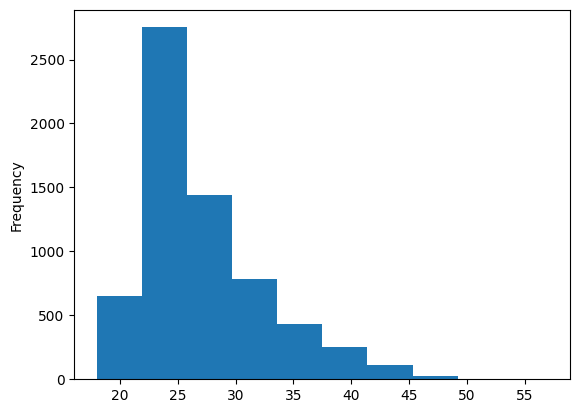

In [117]:
dftrn['Age'].plot(kind = 'hist')

<Axes: xlabel='Gender', ylabel='count'>

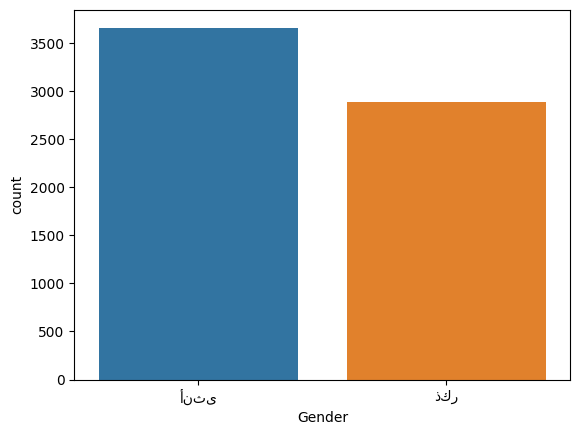

In [102]:
sns.countplot(data=dftrn, x=dftrn['Gender'], hue=dftrn['Gender'])

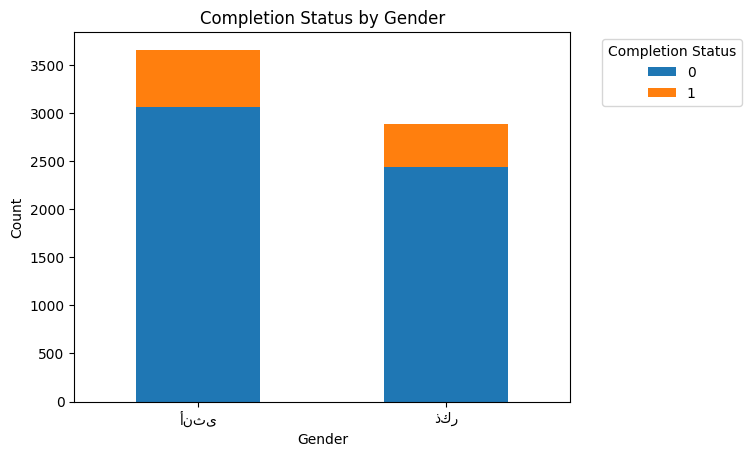

In [103]:
grouped = dftrn.groupby(['Gender', 'Y']).size().unstack(fill_value=0)

# Plot stacked bar plot
grouped.plot(kind='bar', stacked=True)
plt.title('Completion Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Completion Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

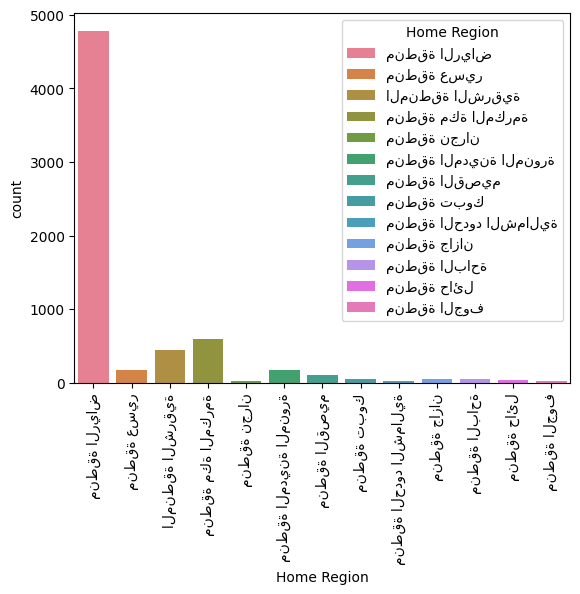

In [104]:
sns.countplot(data=dftrn, x=dftrn['Home Region'], hue=dftrn['Home Region'])
plt.xticks(rotation=90)
plt.show()

In [105]:
dftrn['Completed Degree'].value_counts()

Completed Degree
نعم    5206
لا     1342
Name: count, dtype: int64

In [106]:
dftrn['Level of Education'].value_counts()

Level of Education
البكالوريوس    5429
الماجستير       485
الدبلوم         310
ثانوي           268
الدكتوراه        30
Name: count, dtype: int64

In [107]:
dftrn['Education Speaciality'].unique()

array(['هندسة حاسب الالي', 'الإذاعة والتلفزيون والفيلم',
       'Information Technology', 'حوسبة تطبيقية - (مسار شبكات الحاسب)',
       'نظم المعلومات الحاسوبية', 'هندسة حاسب آلي', 'نظم معلومات',
       'علوم وهندسة الحاسب الآلي', 'نظم المعلومات', 'علوم الحاسبات',
       'علوم حاسب الي', 'تقنية المعلومات', 'Software Engineering',
       'Computer Networking and Cyber security', 'الجغرافيا البشرية',
       'علوم وهندسة الحاسب - ذكاء اصطناعي',
       'Civil and Environmental engineering', 'علوم الحاسب الالي',
       'الرياضيات التطبيقية', 'أمن المعلومات', 'شبكات الحاسب الآلي',
       'علوم الحاسب', 'لغويات تطبيقية', 'علوم حاسب', 'تصميم منتجات',
       'computer science', 'تاريخ اسلامي', nan, 'هندسة شبكات',
       'تطبيقات الحاسب الالي', 'هندسة كهربائية', 'Software engineering',
       'تاريخ', 'علوم حاسب آلي', 'شبكات الحاسب', 'هندسة البرمجيات',
       'نظم معلومات حاسوبيه-قواعد بيانات', 'product design',
       'management information system', 'ENGINEER IN MARINE TECHNOLOGY',
       'اله

In [111]:
dftrn['Employment Status'].fillna(dftrn['Employment Status'].mode().iloc[0], inplace=True)

In [112]:
dftrn['Employment Status'].unique()

array(['غير موظف', 'طالب', 'موظف', 'خريج', 'موظف - طالب', 'عمل حر'],
      dtype=object)